<a href="https://colab.research.google.com/github/houkaita/Estatistica/blob/main/GCC1518_T2_LUCAS_ROCHA_DE_OLIVEIRA_RODRIGUES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parte 1: Pima Indians Diabetes**


## **1.1 Carregamento do Conjunto de Dados**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pima_df = pd.read_csv('diabetes.csv')

pima_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **1.2 Exploração Inicial dos Dados**

In [ ]:
pima_df.info()

pima_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **1.3 Análise Univariada**

### Distribuição das variaveis

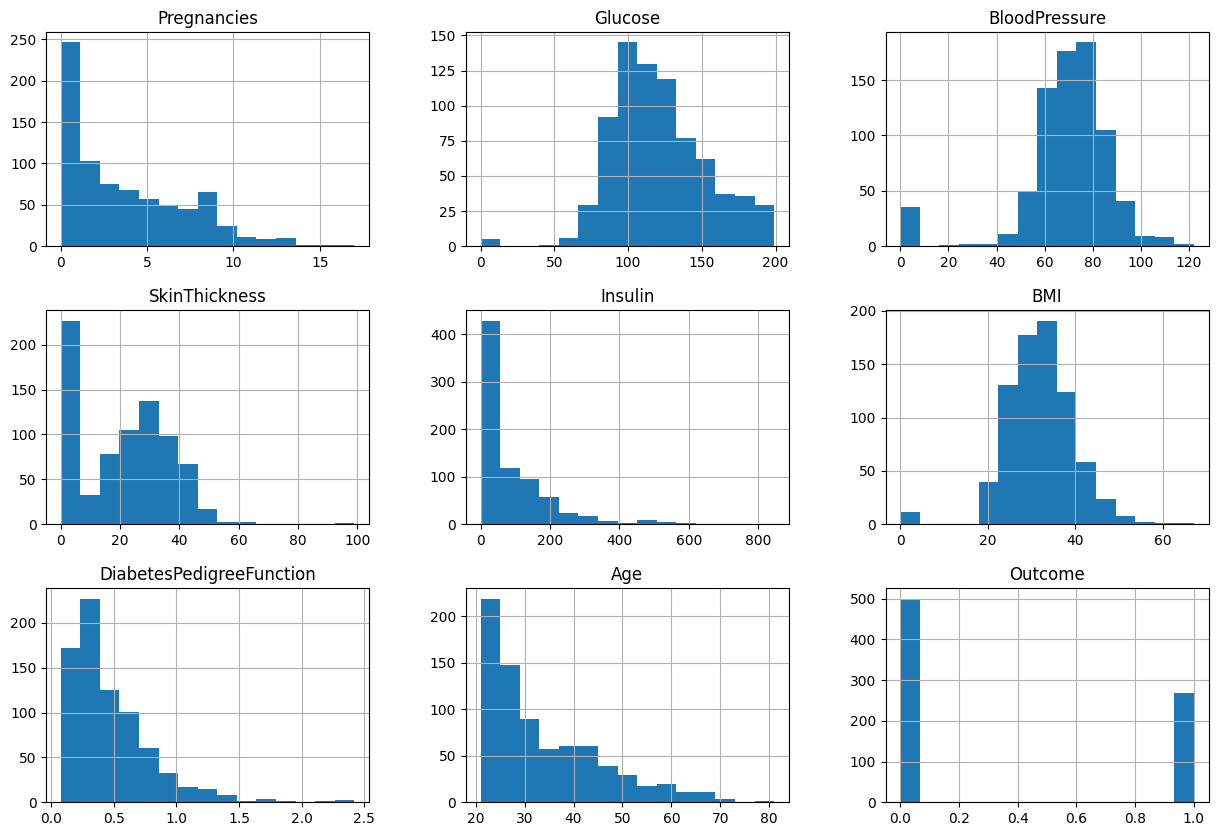

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
pima_df.hist(bins=15, figsize=(15, 10))
plt.show()

plt.figure(figsize=(12, 6))


### Boxplots

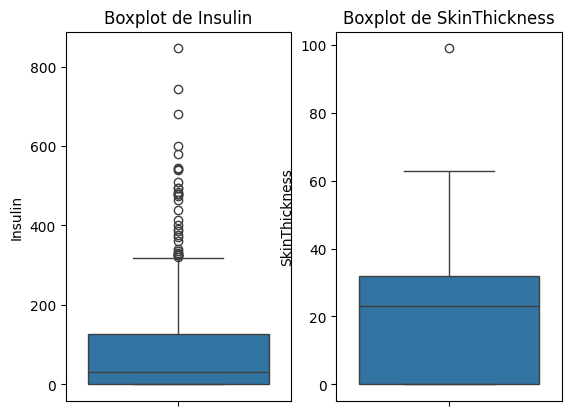

In [ ]:
plt.subplot(1, 2, 1)
sns.boxplot(y=pima_df['Insulin'])
plt.title('Boxplot de Insulin')

plt.subplot(1, 2, 2)
sns.boxplot(y=pima_df['SkinThickness'])
plt.title('Boxplot de SkinThickness')

plt.show()

## **1.4 Análise Bivariada**

### Correlação entre variáveis

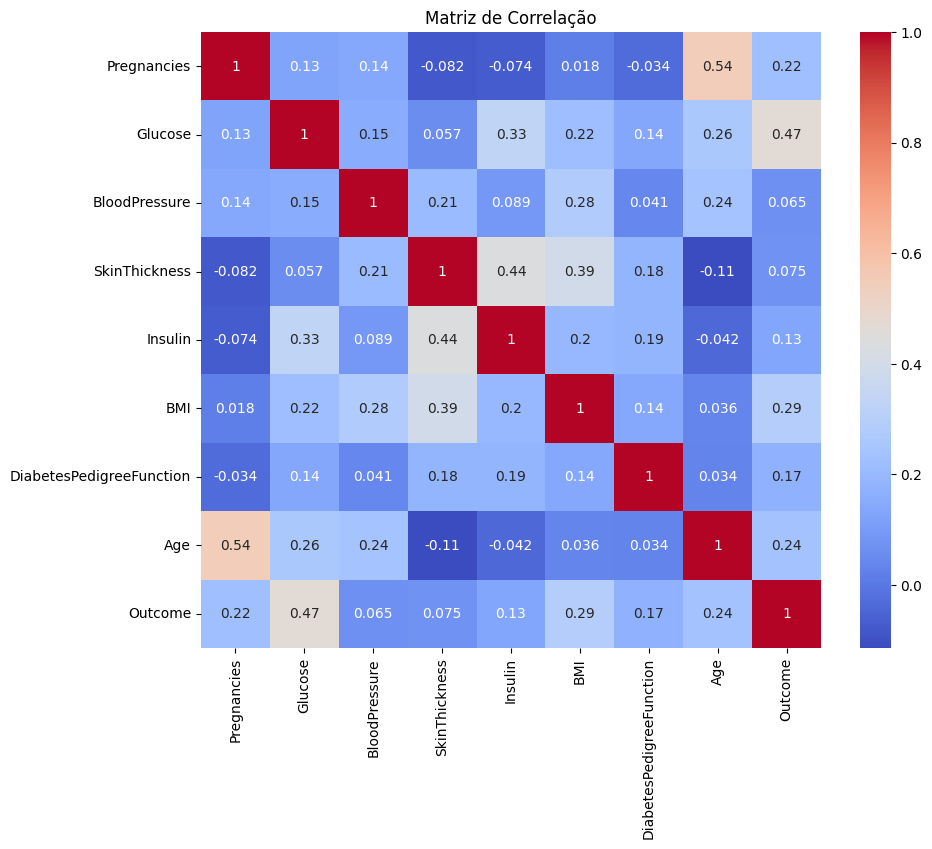

In [ ]:
corr_matrix = pima_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


### Gráficos de Dispersão

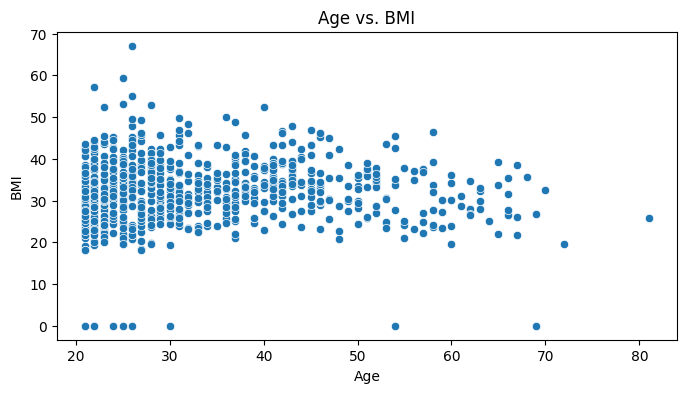

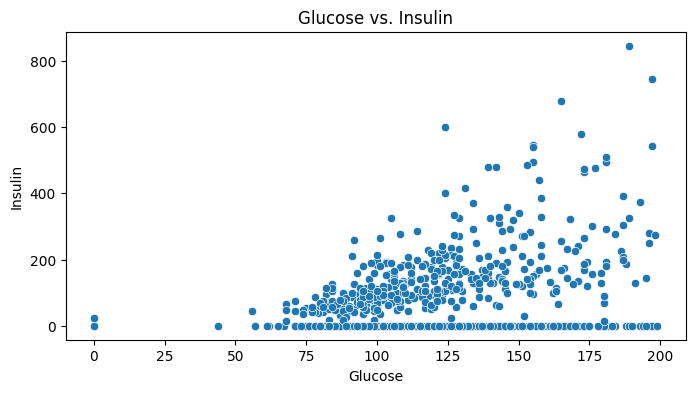

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Age', y='BMI', data=pima_df)
plt.title('Age vs. BMI')
plt.show()

plt.figure(figsize=(8, 4))
sns.scatterplot(x='Glucose', y='Insulin', data=pima_df)
plt.title('Glucose vs. Insulin')
plt.show()


### Boxplot para Glucose por Categoria

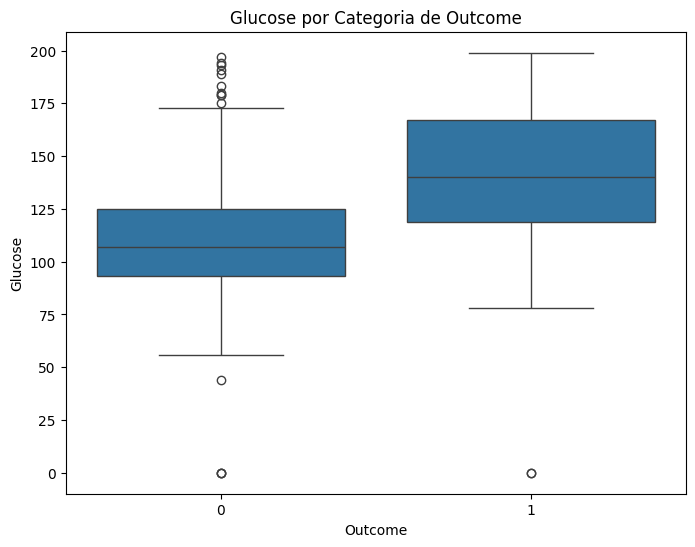

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=pima_df)
plt.title('Glucose por Categoria de Outcome')
plt.show()


## **1.5 Análise de Variáveis Categóricas**

Distribuição da Variável Alvo

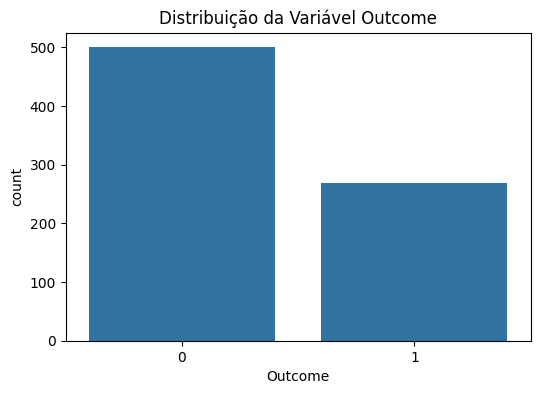

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=pima_df)
plt.title('Distribuição da Variável Outcome')
plt.show()

Comparação por Categoria

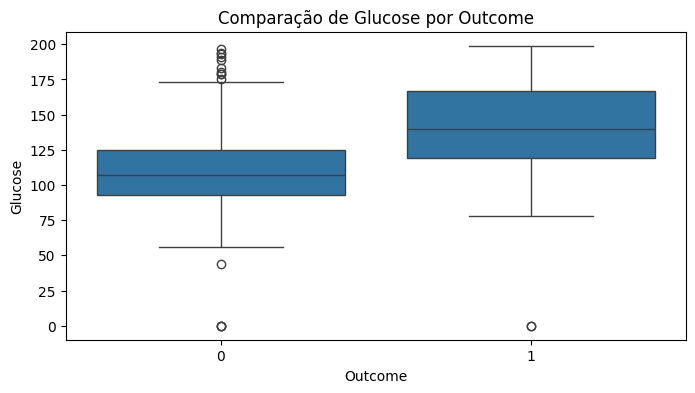

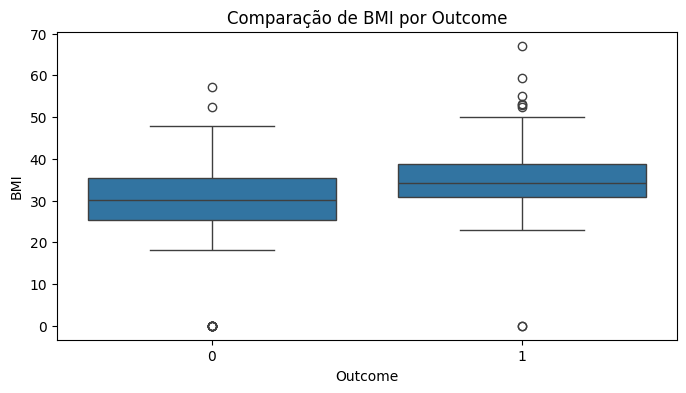

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Outcome', y='Glucose', data=pima_df)
plt.title('Comparação de Glucose por Outcome')
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='Outcome', y='BMI', data=pima_df)
plt.title('Comparação de BMI por Outcome')
plt.show()

## **1.6 Faixas de Glicose**

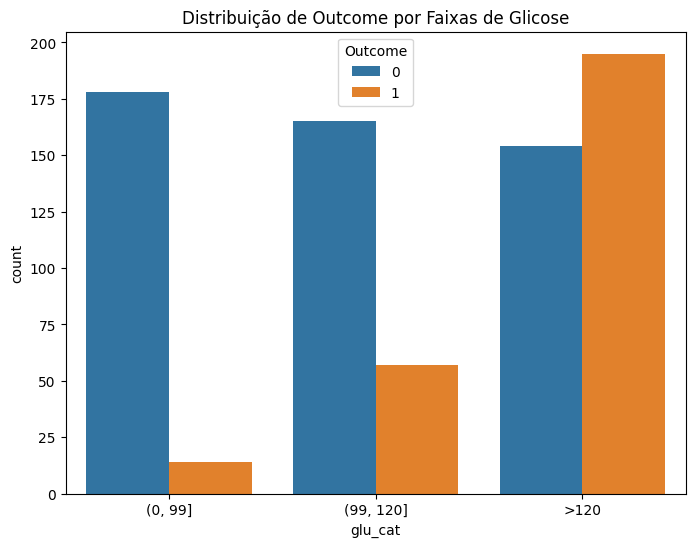

In [ ]:
bins = [0, 99, 120, float('inf')]
labels = ['(0, 99]', '(99, 120]', '>120']

pima_df['glu_cat'] = pd.cut(pima_df['Glucose'], bins=bins, labels=labels, right=True, ordered=True)

plt.figure(figsize=(8, 6))
sns.countplot(x='glu_cat', hue='Outcome', data=pima_df)
plt.title('Distribuição de Outcome por Faixas de Glicose')
plt.show()


# **Parte 2: Adult Income**

## **2.1 Carregar o Conjunto de Dados**

In [ ]:
adult_df = pd.read_csv('adult.csv')

adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## **2.2 Criar uma tabela de Contingência**

In [ ]:
contingency_table = pd.crosstab(adult_df['gender'], adult_df['education'])
print(contingency_table)

education  10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  Assoc-acdm  \
gender                                                                    
Female      457   650   211       61      127      239  220         627   
Male        932  1162   446      186      382      716  536         974   

education  Assoc-voc  Bachelors  Doctorate  HS-grad  Masters  Preschool  \
gender                                                                    
Female           734       2477        113     5097      845         24   
Male            1327       5548        481    10687     1812         59   

education  Prof-school  Some-college  
gender                                
Female             132          4178  
Male               702          6700  


## **2.3 Calcular a Estatística Qui-Quddrado**

In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Quadrado: {chi2}")
print(f"p-valor: {p}")

Chi-Quadrado: 424.7053110654286
p-valor: 4.401401289798295e-81


## **2.4 Calcular o Coeficiente V de Cramer**

In [ ]:
n = contingency_table.sum().sum()
r, c = contingency_table.shape

v_cramer = np.sqrt(chi2 / (n * (min(r-1, c-1))))
print(f"Coeficiente V de Cramer: {v_cramer}")

Coeficiente V de Cramer: 0.09324963195147196
